# Evaluation Bins quality. CheckM1 vs CheckM2

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import kaleido
import plotly.graph_objects as go

In [2]:
# read the data
cmc = pd.read_excel('input/CheckM12_comparison.xlsx')
# one row per organism
cmc.head(2)

,NCBI_accession,domain,phylum,class,order,family,genus,species,Completeness_CheckM2,Contamination_CheckM2,Algorithm_CheckM2,Table_CheckM2,Completeness_CheckM1,Contamination_CheckM1,Level,Marker_lineage_CheckM1,Level_CheckM1
0,GCF_902807005,Bacteria,Chlamydiota,Chlamydiia,Chlamydiales,Chlamydiaceae,Chlamydiifrater,Chlamydiifrater phoenicopteri,96.15,0.15,Neural Network (Specific Model),11,95.27,0.0,1_k,Bacteria,k
1,GCF_902806995,Bacteria,Chlamydiota,Chlamydiia,Chlamydiales,Chlamydiaceae,Chlamydiifrater,Chlamydiifrater volucris,95.88,0.22,Neural Network (Specific Model),11,95.27,0.0,1_k,Bacteria,k


In [23]:
print("Total number of genomes: "+str(len(cmc)))
print("---")
print("Mean completeness (CheckM1): "+str(cmc['Completeness_CheckM1'].mean())[0:4]+" ± "+str(cmc['Completeness_CheckM1'].std())[0:3])
print("Mean completeness (CheckM2): "+str(cmc['Completeness_CheckM2'].mean())[0:4]+" ± "+str(cmc['Completeness_CheckM2'].std())[0:3])
print("---")
print("Genomes with completeness <90 (CheckM1): "+str(len(cmc[cmc['Completeness_CheckM1'] <= 90])))
print("Genomes with completeness <90 (CheckM2): "+str(len(cmc[cmc['Completeness_CheckM2'] <= 90])))
print("---")
print("Total number of Phylum: "+str(len(cmc['phylum'].unique())))
print("---")

Total number of genomes: 715
---
Mean completeness (CheckM1): 98.2 ± 5.1
Mean completeness (CheckM2): 99.3 ± 2.0
---
Genomes with completeness <90 (CheckM1): 19
Genomes with completeness <90 (CheckM2): 2
---
Total number of Phylum: 33
---


In [55]:
# two rows per organism
melt = pd.melt(cmc, id_vars=['NCBI_accession','phylum','class','order','family','genus','Algorithm_CheckM2',
                      'Table_CheckM2','Marker_lineage_CheckM1','Level_CheckM1'], 
                    value_vars=['Completeness_CheckM1', 'Completeness_CheckM2'], 
               ignore_index=False, var_name='Program', value_name='Completeness')
melt['Program'] = melt['Program'].replace(['Completeness_CheckM1'], 'CheckM1')
melt['Program'] = melt['Program'].replace(['Completeness_CheckM2'], 'CheckM2')

melt1 = pd.melt(cmc, id_vars=['NCBI_accession','phylum','class','order','family','genus','Algorithm_CheckM2',
                      'Table_CheckM2','Marker_lineage_CheckM1','Level_CheckM1'], 
                    value_vars=['Contamination_CheckM1', 'Contamination_CheckM2'], 
                ignore_index=False, var_name='Program', value_name='Contamination')
melt1['Program'] = melt1['Program'].replace(['Contamination_CheckM1'], 'CheckM1')
melt1['Program'] = melt1['Program'].replace(['Contamination_CheckM2'], 'CheckM2')

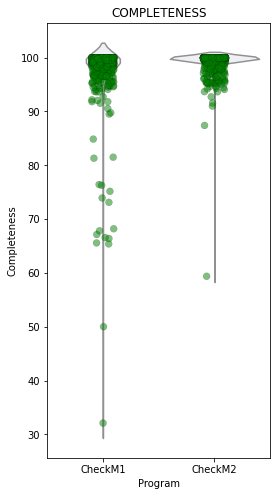

In [53]:
fig = plt.figure(figsize = (4, 8))

g = sns.violinplot(data=melt, y='Completeness', x='Program', color='#edf0f5').set(title='COMPLETENESS')
g = sns.stripplot(data=melt, y='Completeness', x='Program', alpha=0.5, s=7, edgecolor="black",
                linewidth=0.2, color='green')

fig.savefig('Completeness.svg', dpi=150,format='svg')

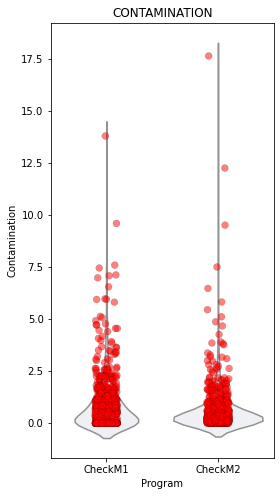

In [58]:
fig = plt.figure(figsize = (4, 8))

sns.violinplot(data=melt1, y='Contamination', x='Program', color='#edf0f5').set(title='CONTAMINATION')
sns.stripplot(data=melt1, y='Contamination', x='Program', alpha=0.5, s=7, edgecolor="black",
                linewidth=0.2, color='red')

fig.savefig('Contamination.svg', dpi=150,format='svg')